In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_sales = pd.read_csv("/content/ShopEase Sales.csv")

df_sales.head()

,Customer ID,Product ID,Order Date,Region,Quantity Ordered,Product Name,Category,Price,Total Sales
0,1307,18,2022-10-08,North,2,Mousepad,Electronics,1054.27,2108.54
1,1340,18,2022-07-07,North,9,Mousepad,Electronics,1054.27,9488.43
2,1380,18,2022-06-15,East,7,Mousepad,Electronics,1054.27,7379.89
3,1009,18,2022-07-05,South,1,Mousepad,Electronics,1054.27,1054.27
4,1048,18,2022-02-21,East,3,Mousepad,Electronics,1054.27,3162.81


In [3]:
df_products = pd.read_csv("/content/ShopEase Products.csv")

df_products.head()

,Product ID,Product Name,Category,Price,Stock
0,1,Laptop,Electronics,755.33,185
1,2,Smartphone,Electronics,1901.92,55
2,3,Tablet,Accessories,1466.67,52
3,4,Mouse,Accessories,1201.33,4
4,5,Keyboard,Accessories,320.48,43


In [6]:
# Group by product and calculate total quantity sold
grouped_sales = df_sales.groupby('Product Name')['Quantity Ordered'].sum()
print("Grouped Sales Data:\n", grouped_sales)

Grouped Sales Data:
 Product Name
Charger                 974
External Hard Drive     986
HDMI Cable              956
Headphones              860
Keyboard               1001
Laptop                  872
Laptop Stand            978
Memory Card            1060
Monitor                 909
Mouse                  1037
Mousepad                951
Power Bank             1089
Printer                 970
Router                  911
Smartphone              994
Smartwatch             1043
Speakers               1057
Tablet                  915
USB Cable              1183
Webcam                  925
Name: Quantity Ordered, dtype: int64


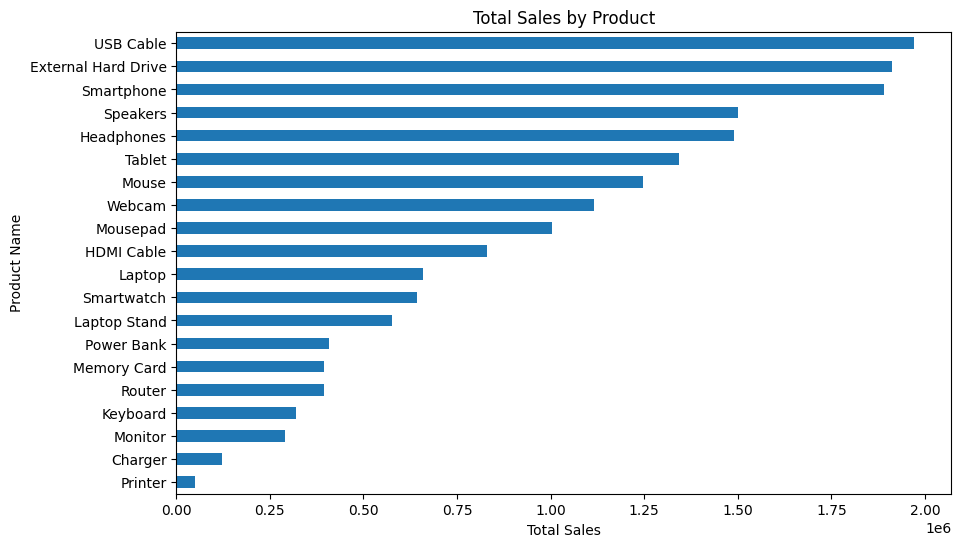

In [7]:
# 1. Bar Plot: Total Sales by Product

plt.figure(figsize=(10, 6))
sales_by_product = df_sales.groupby('Product Name')['Total Sales'].sum().sort_values()
sales_by_product.plot(kind='barh')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [11]:
sales_by_product.sort_values(ascending= False)

,Total Sales
Product Name,
USB Cable,1971540.48
External Hard Drive,1912958.32
Smartphone,1890508.48
Speakers,1499946.42
Headphones,1490973.40
Tablet,1342003.05
Mouse,1245779.21
Webcam,1115753.50
Mousepad,1002610.77


<ipython-input-18-3378f6a06202>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product_sorted, y=sales_by_product_sorted.index, palette='viridis')


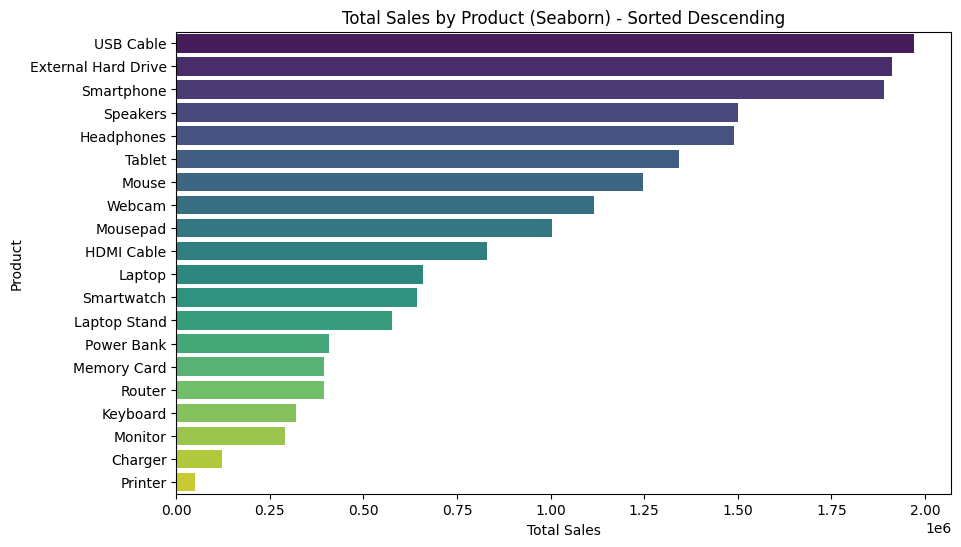

In [18]:
# Seaborn Variant

# Sort the Series in descending order
sales_by_product_sorted = sales_by_product.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product_sorted, y=sales_by_product_sorted.index, palette='viridis')
plt.title('Total Sales by Product (Seaborn) - Sorted Descending')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

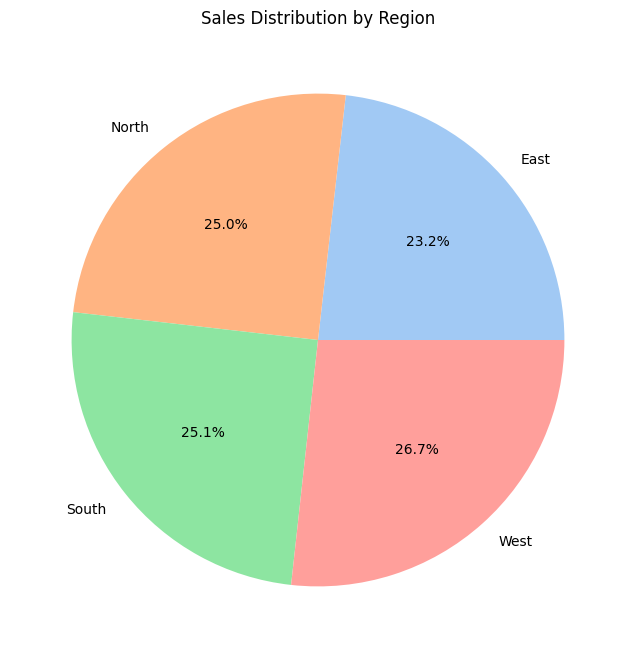

In [20]:
# 2. Pie Chart: Sales Distribution by Region

region_sales = df_sales.groupby('Region')['Total Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.show()

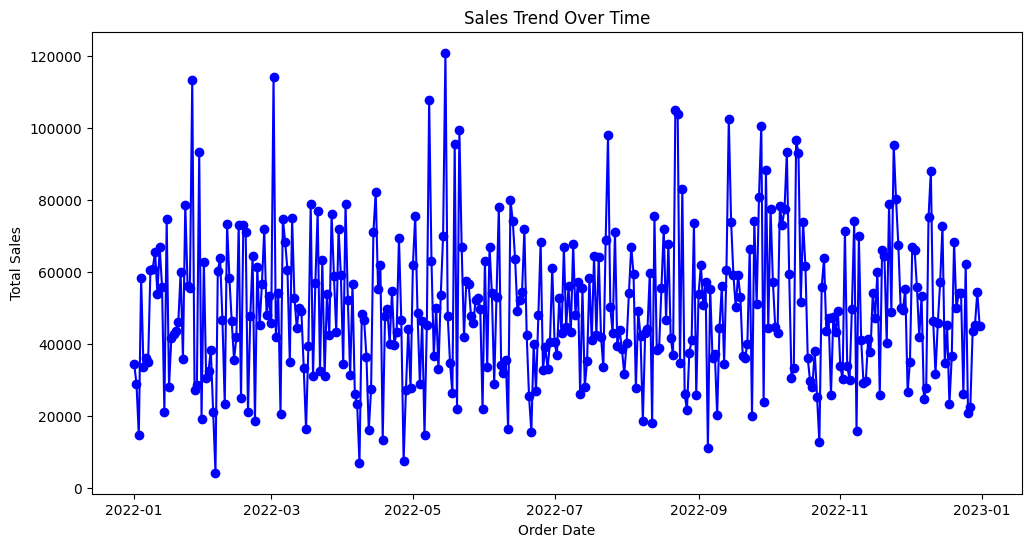

In [21]:
# 3. Line Plot: Sales Trend Over Time

df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
sales_trend = df_sales.groupby('Order Date')['Total Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, marker='o', linestyle='-', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

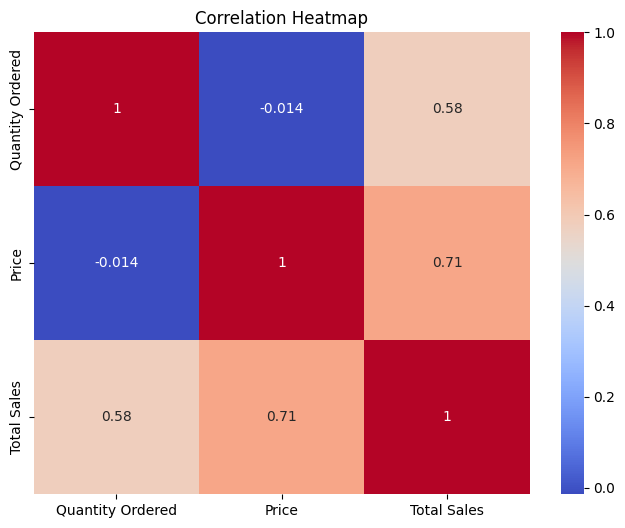

In [22]:
# 5. Heatmap: Correlation between Numerical Features
plt.figure(figsize=(8, 6))
corr = df_sales[['Quantity Ordered', 'Price', 'Total Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

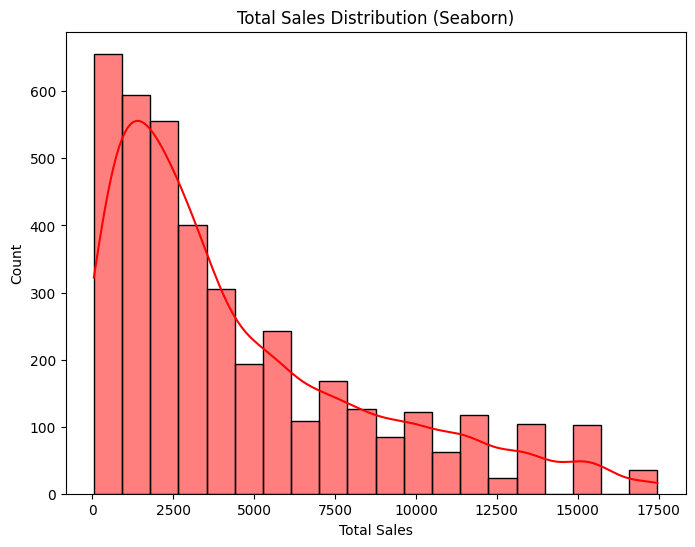

In [23]:
# Seaborn Variant

plt.figure(figsize=(8, 6))
sns.histplot(df_sales['Total Sales'], bins=20, kde=True, color='red')
plt.title('Total Sales Distribution (Seaborn)')
plt.show()

<ipython-input-24-cec2144f955e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=df_sales, palette='Set2')


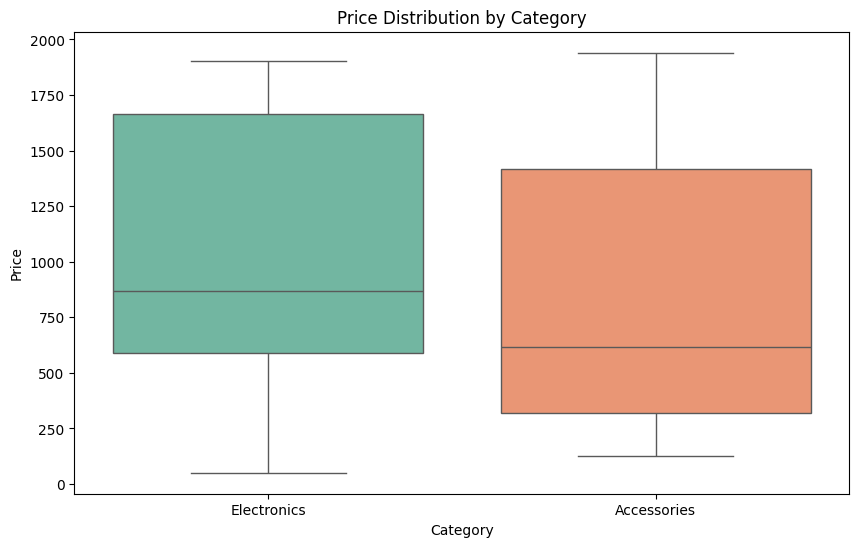

In [24]:
# 7. Box Plot: Price Distribution by Category

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df_sales, palette='Set2')
plt.title('Price Distribution by Category')
plt.show()

## **Univariate Analysis**
Objective: Understand the distribution and summary statistics of individual variables.

### Key Techniques
- Histograms (for numerical data)

- Bar Charts (for categorical data)

- Box Plots (for detecting outliers)

- Summary Statistics (mean, median, mode, variance)

### Questions to Explore
1. What is the distribution of Total Sales? (Histogram)

2. Which Region has the highest number of orders? (Bar Chart)

3. Are there any outliers in Price? (Box Plot)

4. What is the average Quantity ordered per transaction? (Mean/Median)

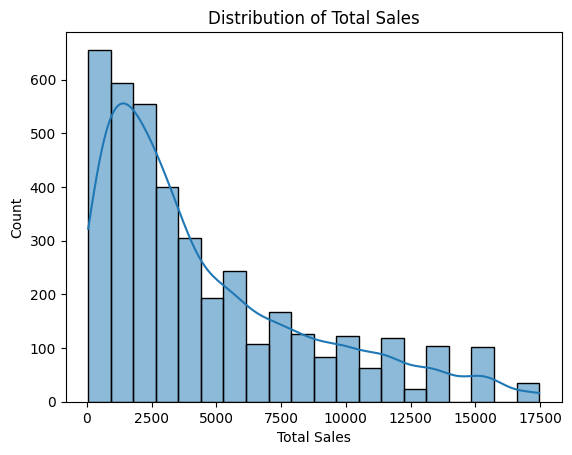

In [29]:
# Histogram of Total Sales
sns.histplot(data=df_sales, x="Total Sales", bins=20, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

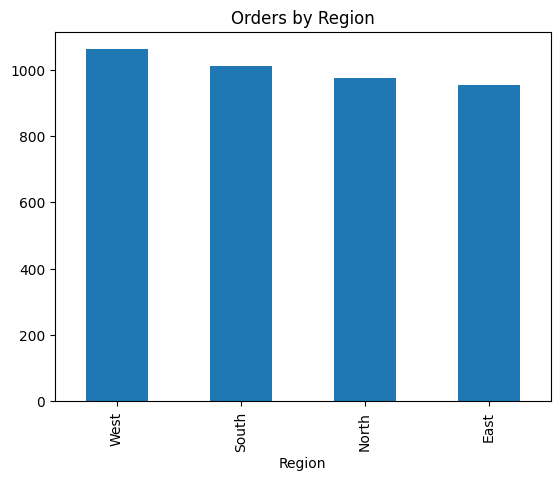

In [26]:
# Bar Chart of Orders by Region
df_sales["Region"].value_counts().plot(kind="bar")
plt.title("Orders by Region")
plt.show()

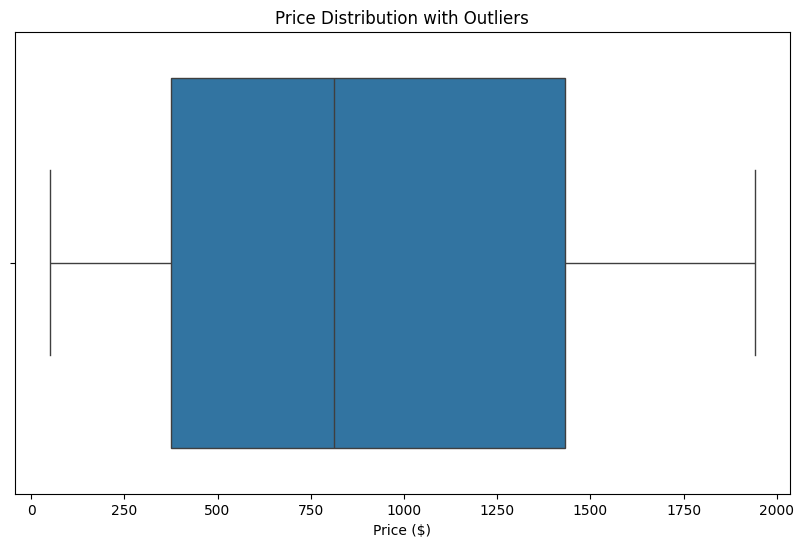

In [33]:
# Outlier detection

plt.figure(figsize=(10,6))
sns.boxplot(data=df_products, x='Price')
plt.title('Price Distribution with Outliers')
plt.xlabel('Price ($)')
plt.show()

In [35]:
# Average Quantity Ordered

avg_quantity = df_sales['Quantity Ordered'].mean()
median_quantity = df_sales['Quantity Ordered'].median()

print(f"Average quantity per order: {avg_quantity:.2f}")
print(f"Median quantity per order: {median_quantity}")

Average quantity per order: 4.92
Median quantity per order: 5.0


## **Bivariate Analysis**
Objective: Examine relationships between two variables.

### Key Techniques
- Scatter Plots (numerical vs. numerical)

- Bar Plots (categorical vs. numerical)

- Correlation Heatmaps (for numerical variables)

- Grouped Box Plots (categorical vs. numerical)

### Questions to Explore
1. Is there a relationship between Price and Total Sales? (Scatter Plot)

2. Does Category affect Total Sales? (Bar Plot)

3. What is the correlation between Quantity and Total Sales? (Heatmap)

4. How does Region influence Price? (Box Plot)

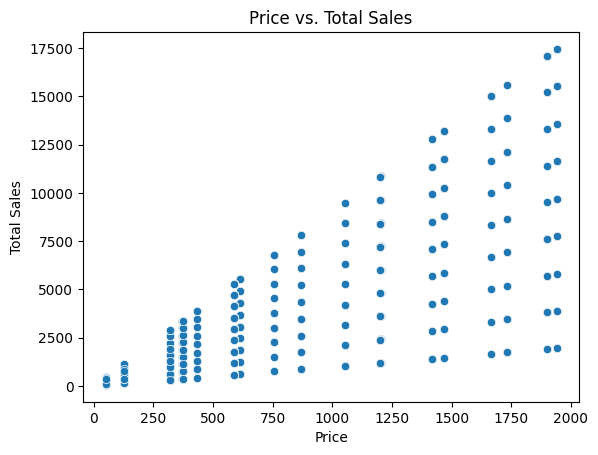

In [27]:
# Scatter Plot: Price vs. Total Sales
sns.scatterplot(data=df_sales, x="Price", y="Total Sales")
plt.title("Price vs. Total Sales")
plt.show()

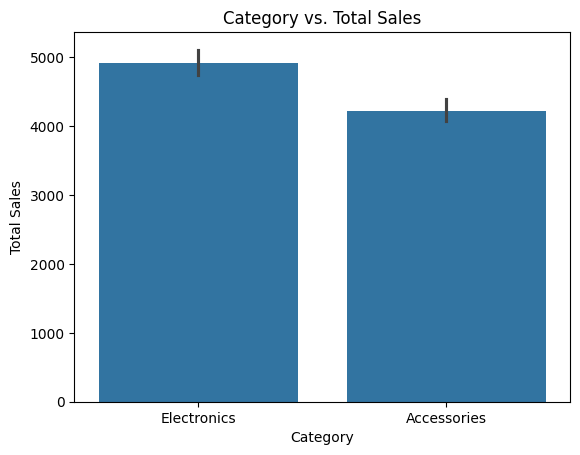

In [28]:
# Bar Plot: Category vs. Total Sales
sns.barplot(data=df_sales, x="Category", y="Total Sales")
plt.title("Category vs. Total Sales")
plt.show()

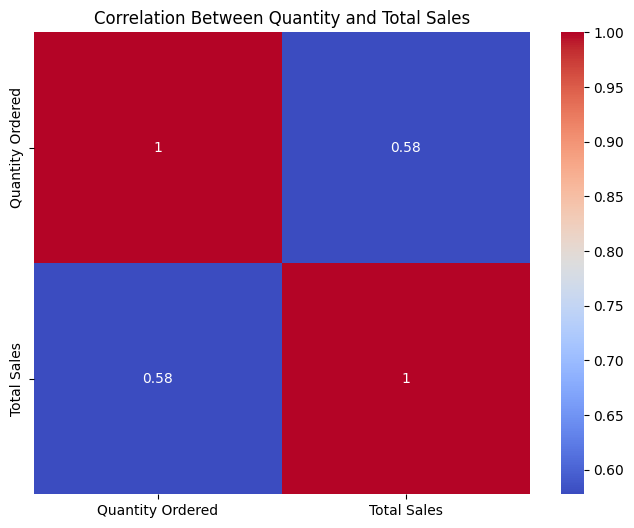

In [36]:
# Quantity vs. Total Sales Correlation

# Calculate correlation
correlation = df_sales[['Quantity Ordered', 'Total Sales']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity and Total Sales')
plt.show()

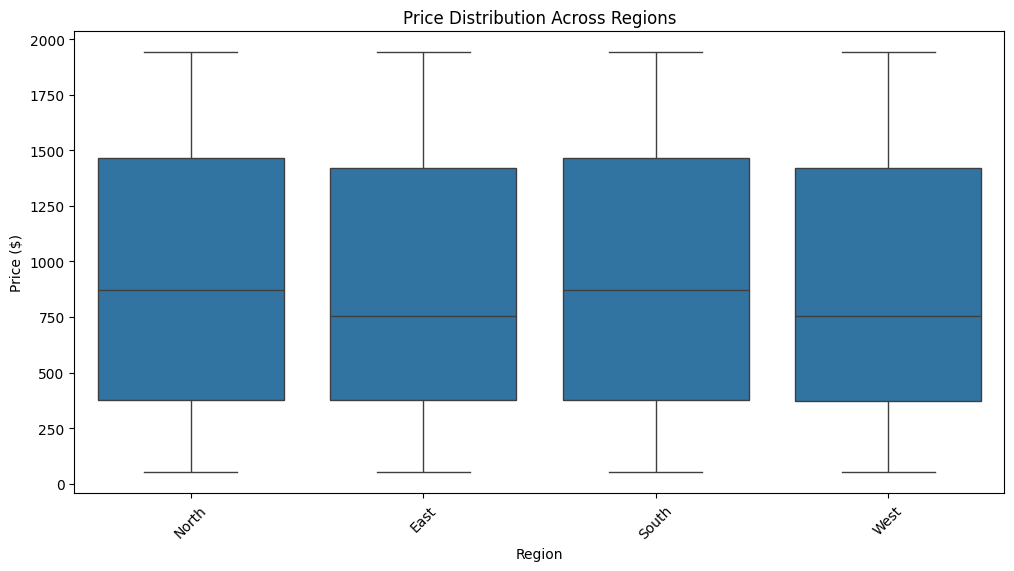

In [37]:
# Region vs. Price

plt.figure(figsize=(12,6))
sns.boxplot(data=df_sales, x='Region', y='Price')
plt.title('Price Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

## **Multivariate Analysis**
Objective: Analyze interactions between three or more variables.

### Key Techniques
- FacetGrid (for visualizing multiple dimensions)

- Pair Plots (for relationships across multiple variables)

- 3D Scatter Plots (for numerical interactions)

- Stacked Bar Charts (for categorical interactions)

### Questions to Explore
1. How do Region, Category, and Total Sales interact? (FacetGrid)

2. What is the combined effect of Price and Quantity on Total Sales? (3D Plot)

3. Which Product Category performs best in each Region? (Stacked Bar Chart)

4. Are there any hidden patterns in Order Date, Quantity, and Total Sales? (Time Series Analysis)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


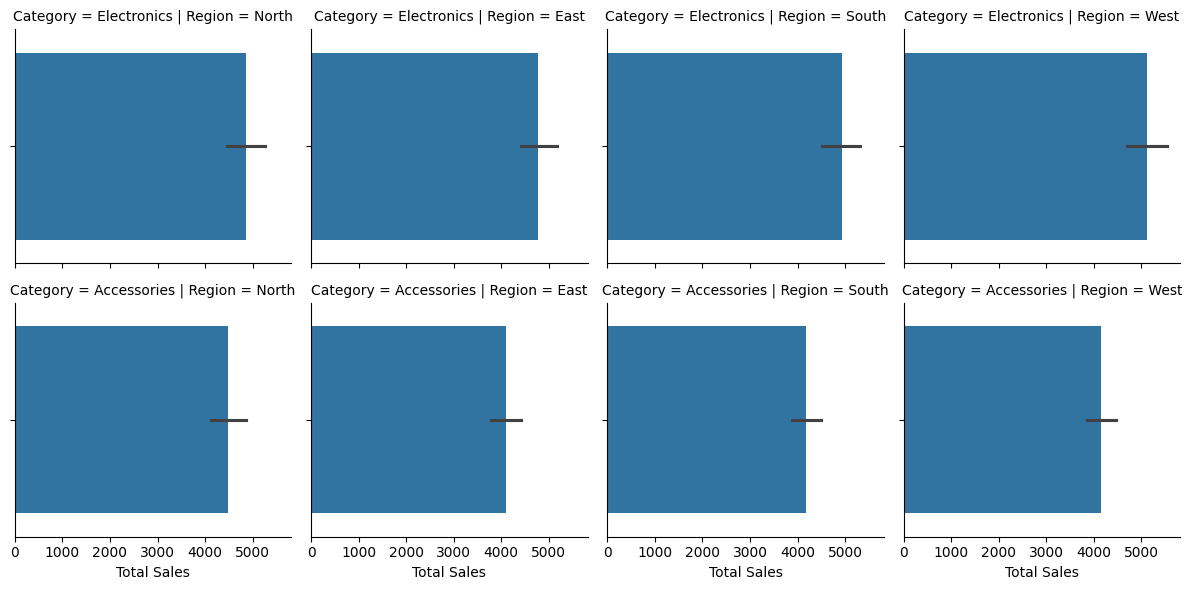

In [30]:
# FacetGrid: Region vs. Category vs. Total Sales
g = sns.FacetGrid(df_sales, col="Region", row="Category")
g.map(sns.barplot, "Total Sales")
plt.show()



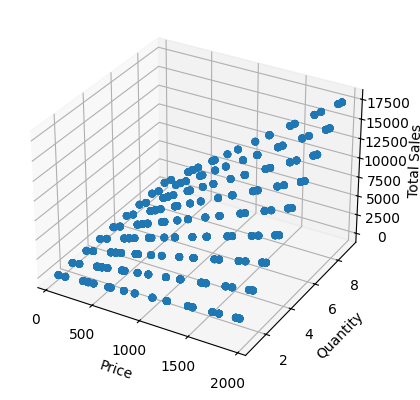

In [32]:
# 3D Scatter Plot (requires mpl_toolkits)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sales["Price"], df_sales["Quantity Ordered"], df_sales["Total Sales"])
ax.set_xlabel("Price")
ax.set_ylabel("Quantity")
ax.set_zlabel("Total Sales")
plt.show()

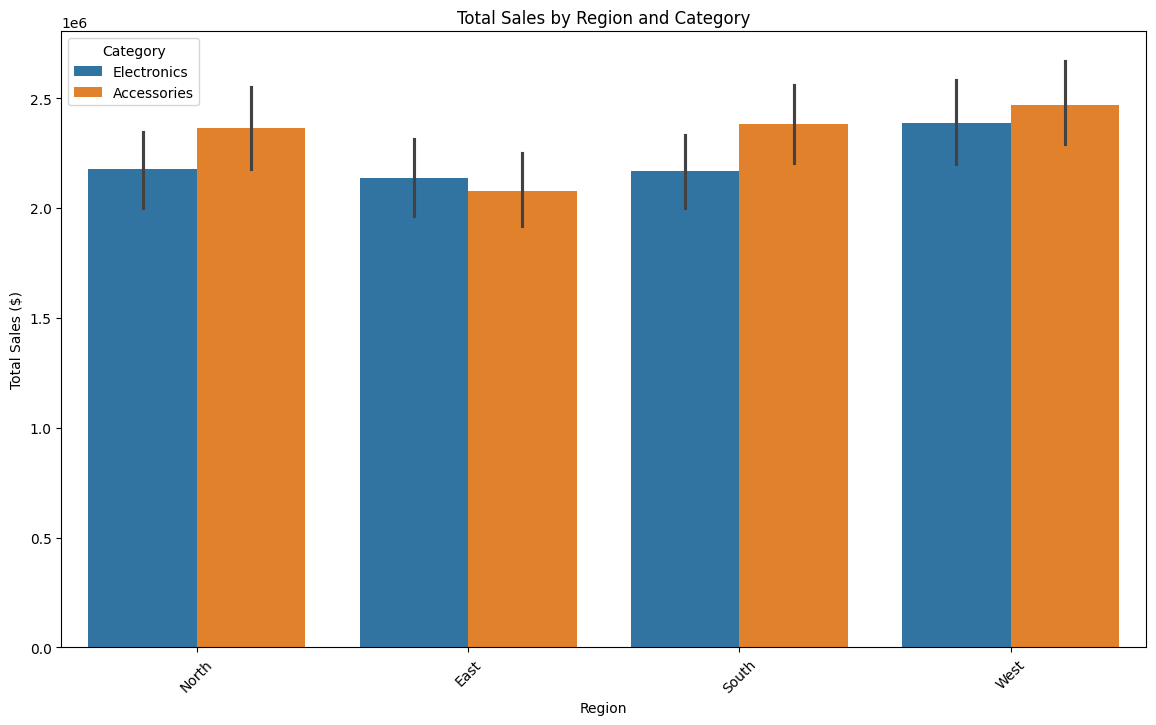

In [38]:
# Region, Category & Total Sales

plt.figure(figsize=(14,8))
sns.barplot(data=df_sales, x='Region', y='Total Sales', hue='Category', estimator=sum)
plt.title('Total Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Category Performance by Region

# Create pivot table
pivot_table = df_sales.pivot_table(index='Region', columns='Category', values='Total Sales', aggfunc='sum')

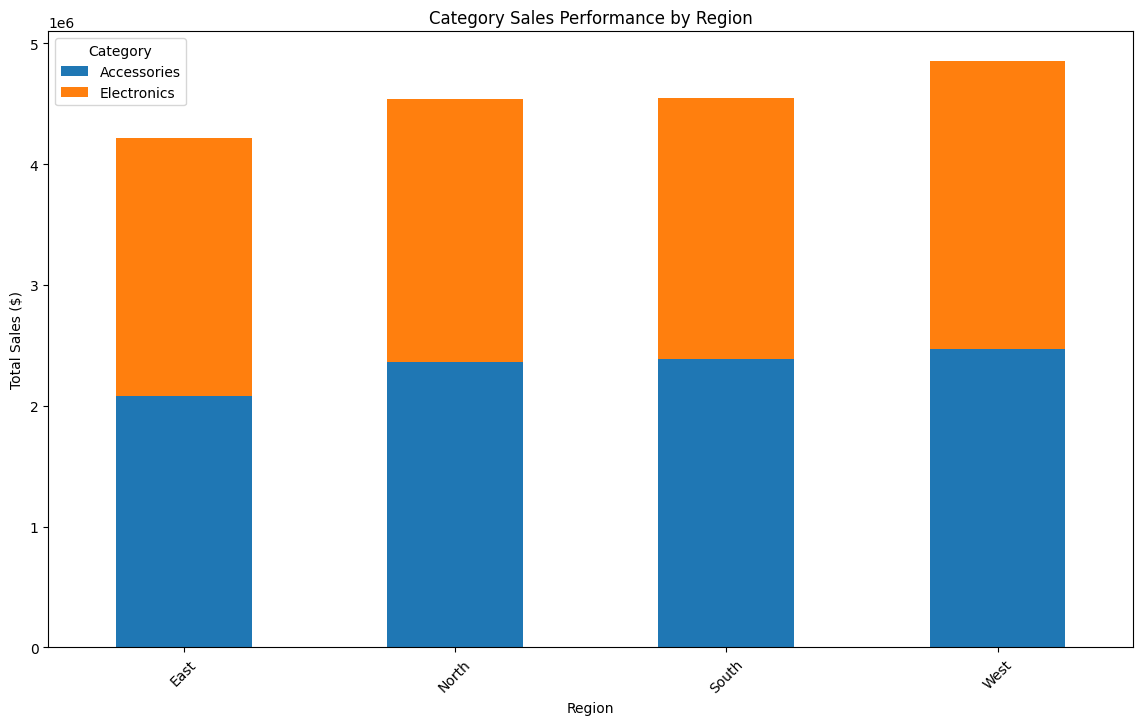

In [41]:
# Plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(14,8))
plt.title('Category Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

In [48]:
# Time Series Analysis
# Convert to datetime and extract month
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Month'] = df_sales['Order Date'].dt.month


In [45]:
# Group by month and category
monthly_sales = df_sales.groupby(['Month', 'Category'])['Total Sales'].sum().unstack()

monthly_sales

Category,Accessories,Electronics
Month,,
1,700928.99,835063.15
2,660606.48,647456.99
3,856858.19,797610.53
4,604564.83,663766.42
5,855340.32,822386.63
6,677385.07,739659.36
7,709463.99,825779.40
8,858398.54,692622.01
9,848714.38,748771.21


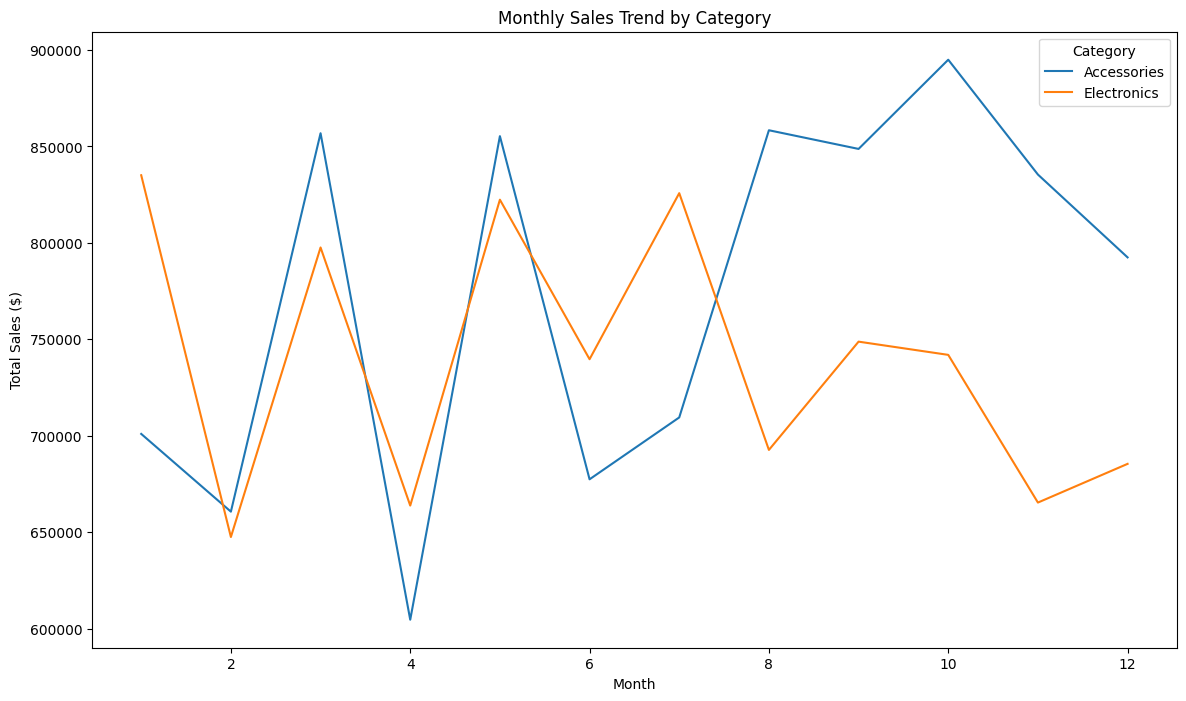

In [46]:
# Plot
monthly_sales.plot(figsize=(14,8))
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category')
plt.show()

### Alternatively to have month names

In [50]:
# Convert to datetime and extract month name
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Month'] = df_sales['Order Date'].dt.month_name()  # Get full month names
# Alternative: df_sales['Order Date'].dt.strftime('%b') for abbreviated names (Jan, Feb, etc.)



In [51]:
# Ensure proper chronological ordering of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_sales['Month'] = pd.Categorical(df_sales['Month'], categories=month_order, ordered=True)



In [52]:
# Group by month and category
monthly_sales = df_sales.groupby(['Month', 'Category'])['Total Sales'].sum().unstack()

monthly_sales

<ipython-input-52-0fae9b078e68>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_sales.groupby(['Month', 'Category'])['Total Sales'].sum().unstack()


Category,Accessories,Electronics
Month,,
January,700928.99,835063.15
February,660606.48,647456.99
March,856858.19,797610.53
April,604564.83,663766.42
May,855340.32,822386.63
June,677385.07,739659.36
July,709463.99,825779.40
August,858398.54,692622.01
September,848714.38,748771.21


<Figure size 1400x800 with 0 Axes>

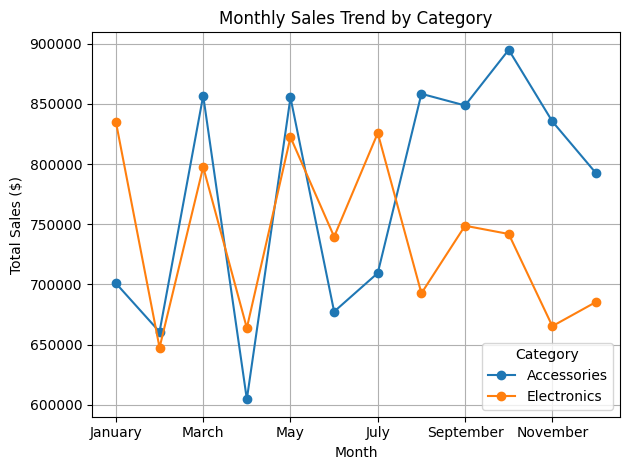

In [53]:
# Plot
plt.figure(figsize=(14,8))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()